# Importing Dependencies


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Collection

In [16]:
wine_dataset = pd.read_csv("winequality-red.csv")

In [17]:
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
wine_dataset.columns = wine_dataset.columns.str.replace(" ",'_')

In [19]:
wine_dataset

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Set Expalination

* Fixed Acidity ---> most acids involved with wine are non-volatile (Do Not Evaporate Readily)


* Volatile Acidity ---> the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste


* Citric Acid ---> found in small quantities, citric acid can add 'freshness' and flavor to wines


* Residual Sugar ---> the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet


* Chlorides ---> The amount of salt in the wine


* Free Sulphur Dioxide ---> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine


* Total Sulphur Dioxide ---> amount of free and bond forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine


* Density ---> the density of water is close to that of water depending on the percent alcohol and sugar content


* Sulphates ---> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant


* pH ---> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

###### According to pH we can judge the quality of our wine
quality column is already  available in out data to train our model accordingly

In [48]:
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [21]:
# Sets the good theme for our graphs

In [22]:
wine_dataset.shape

(1599, 12)

In [24]:
wine_dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Catering Null Values

In [39]:
wine_dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* Conclusion ---> There is no null values in data

* Finding Correlation between data points

In [25]:
wine_dataset.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Data Analysis and Visualization

* Plotting Correlation dataframe on heatmap for better understanding

In [26]:
correlation = wine_dataset.corr()

<AxesSubplot:>

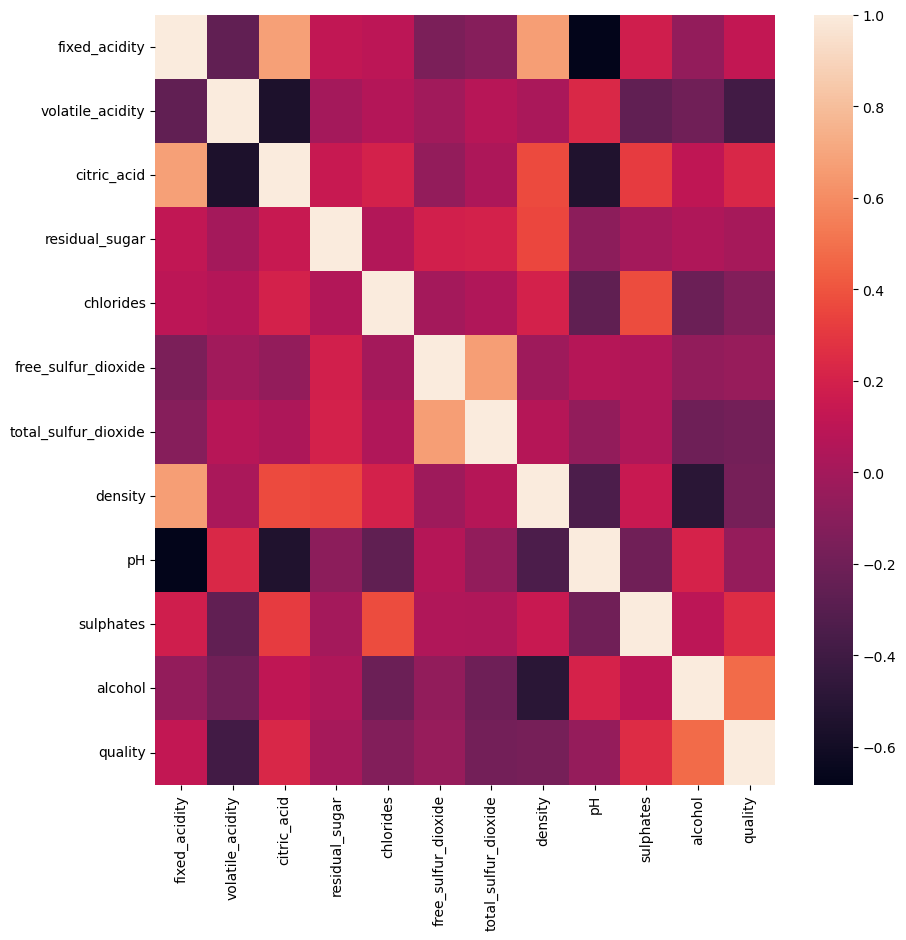

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation)

<AxesSubplot:>

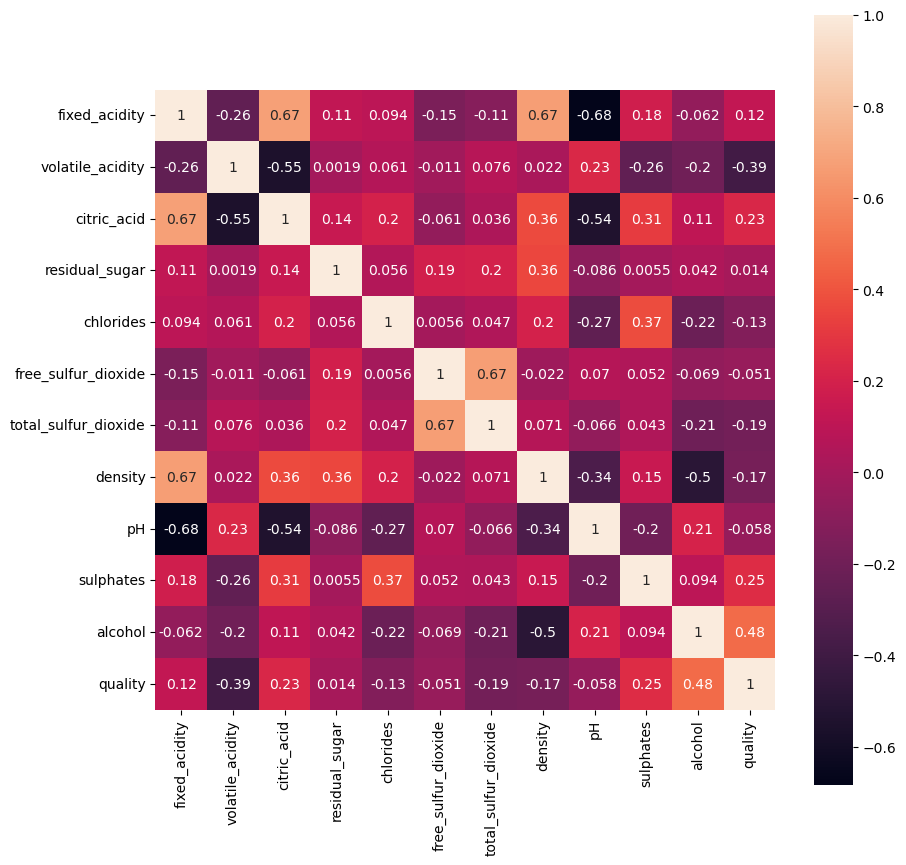

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,annot=True,annot_kws={'size':10})

<AxesSubplot:>

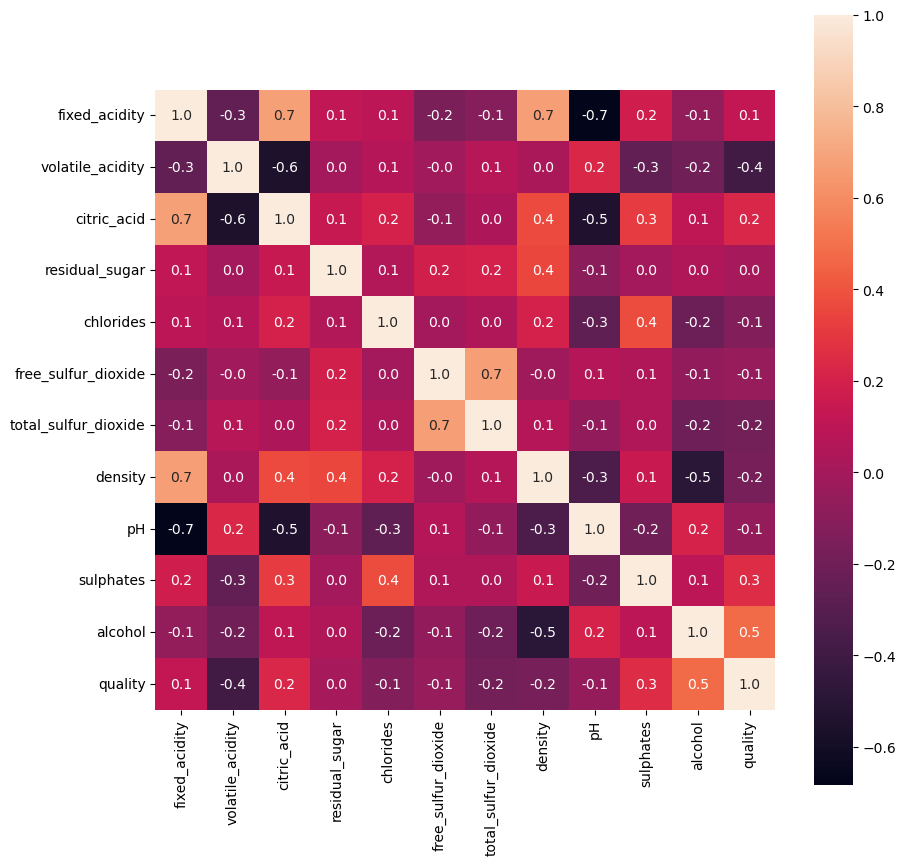

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,annot=True,annot_kws={'size':10}, fmt='.1f')

<AxesSubplot:>

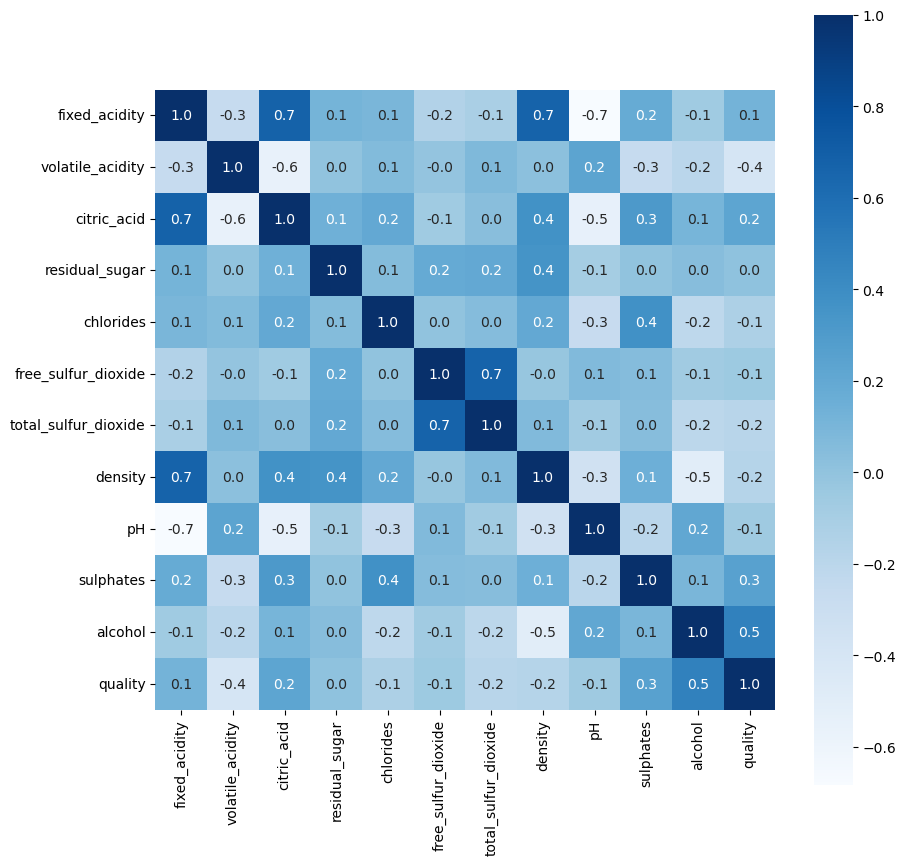

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,annot=True,annot_kws={'size':10}, fmt='.1f', cmap= 'Blues')

* Finding Outliers in the given data

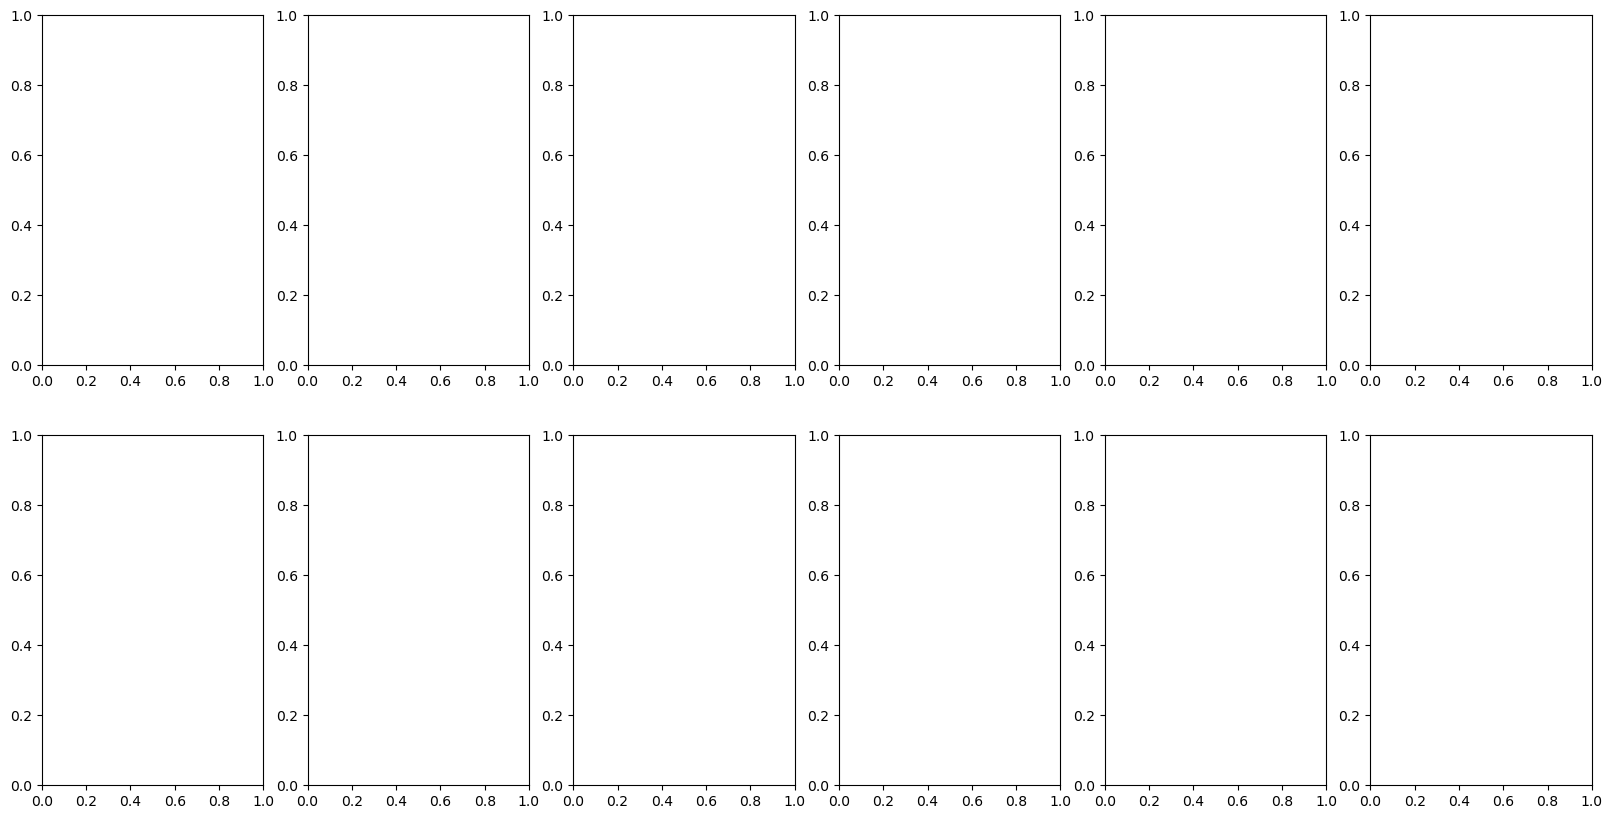

In [50]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0

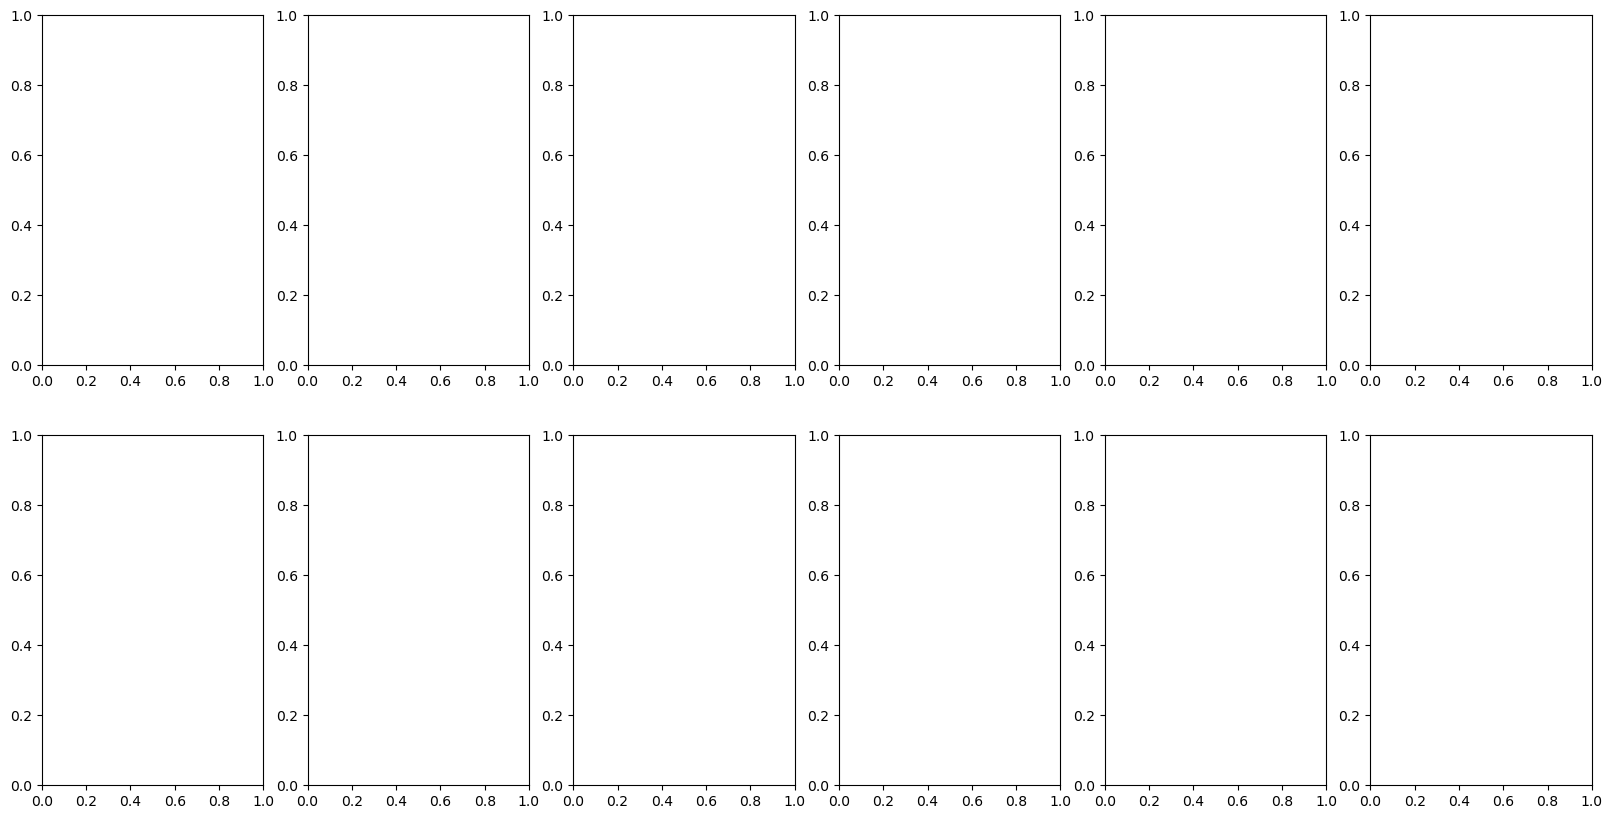

In [51]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
axes = axes.flatten()

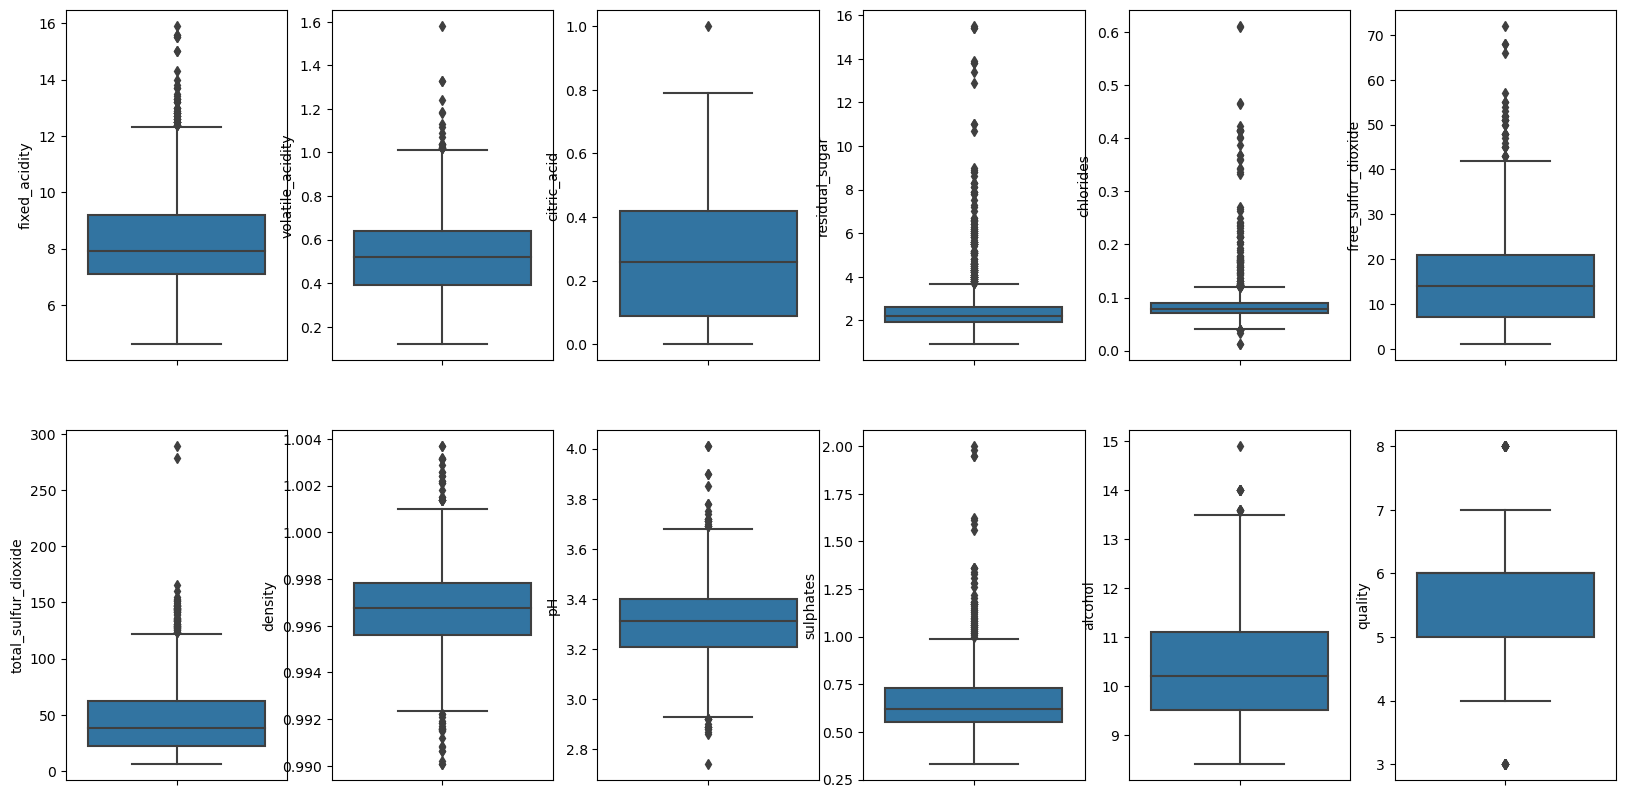

In [52]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
axes = axes.flatten()

for i,j in wine_dataset.items():
    sns.boxplot(y=i, data=wine_dataset, ax=axes[index])
    index+=1

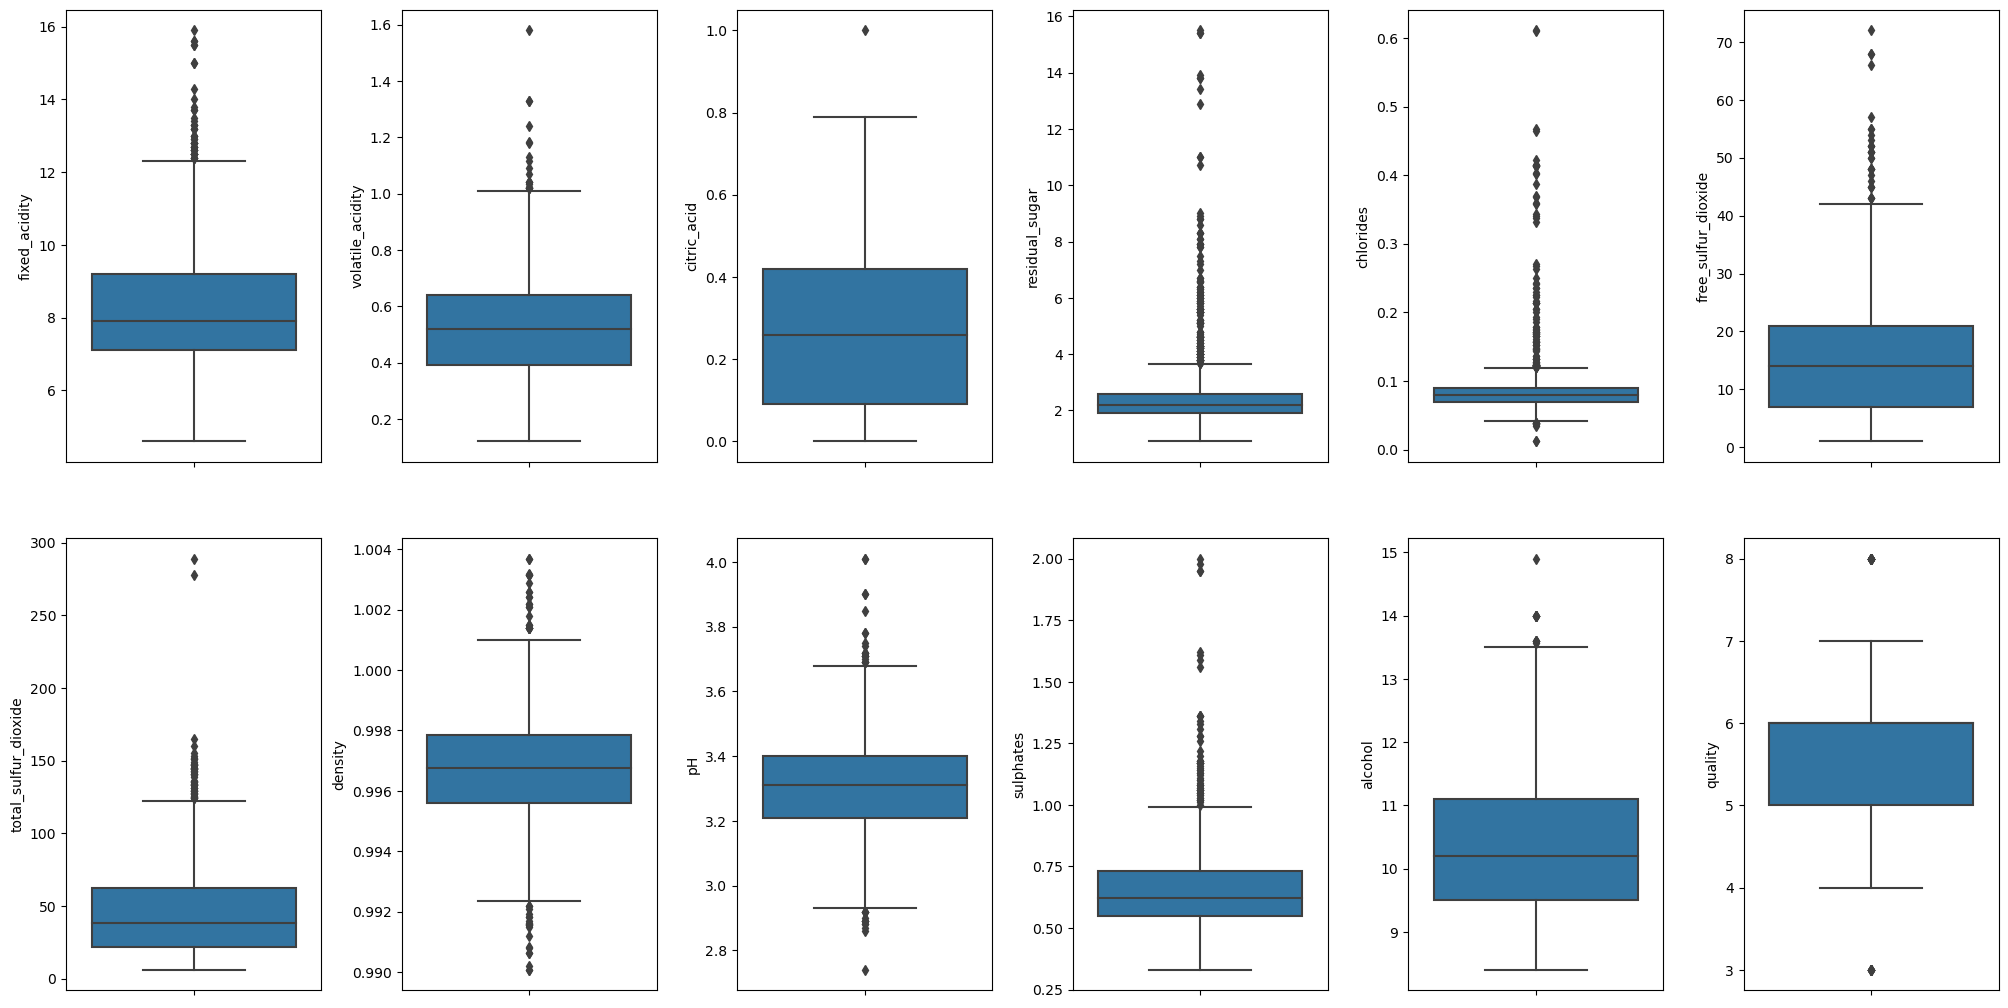

In [53]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
axes = axes.flatten()

for i,j in wine_dataset.items():
    sns.boxplot(y=i, data=wine_dataset, ax=axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=5.0)

In [54]:
wine_dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* Number of Values for Each Quality

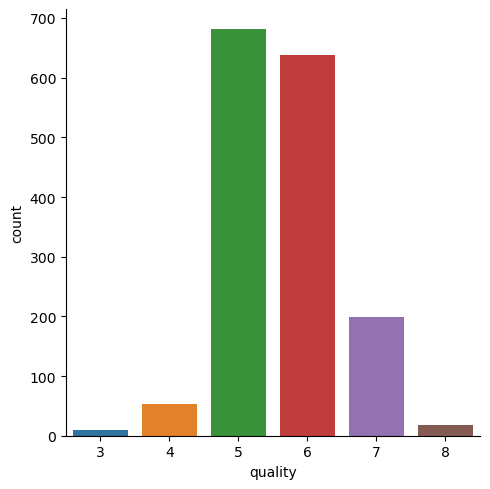

In [55]:
# Plotting for type of qualities
sns.catplot(x='quality', data=wine_dataset, kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

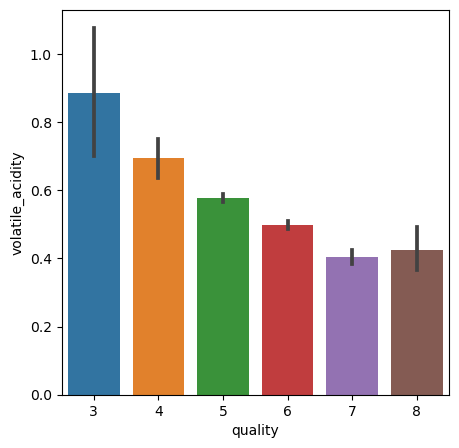

In [56]:
# Plotting Volatile Acidity Vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset, x='quality', y='volatile_acidity')

The outcome is Acidity is inversely propotional to Quality if Volatile Acidity increases Quality Decreases
* We have aleady seen this in correlation plot

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

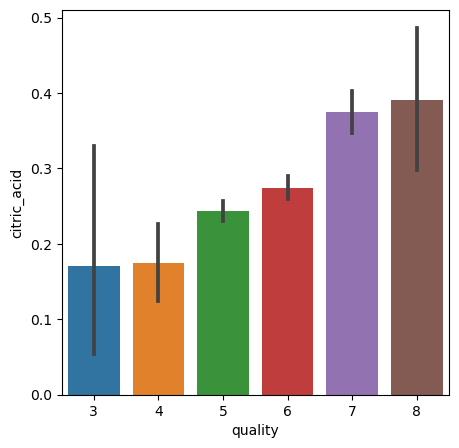

In [46]:
# Plotting Citric Acid Vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset, x='quality', y='citric_acid')

The outcome is Citric Acid is directly propotional to Quality if Cirtic Acid increases Quality increases

# Data Preprocessing

In [58]:
X = wine_dataset.drop('quality', axis=1)

In [59]:
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

* LABEL BINARIZATION
    Changing the label values to 0 or 1
    in our case we are changing <6 values in quality column with 0
    and >6 with 1
    
    * As our model will consider that qulity is bad means 0 and good quality means 1

In [60]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>7 else 0 )

In [61]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


* We can also do this without using lamda funcitom

In [62]:
def quality_binazrization(y_value):
    if y_value>7:
        return 1
    else:
        return 0

In [65]:
Y_dash = wine_dataset['quality'].apply(quality_binazrization)

In [67]:
print(Y_dash)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# Splitting Data

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [70]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training
Random Forest Classifier

In [71]:
model = RandomForestClassifier()

In [72]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation
Accuracy Score

In [74]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


print("The accuracy is: ", training_data_accuracy)

The accuracy is:  1.0


In [73]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy is: ", test_data_accuracy)

The accuracy is:  0.9875


# Building Predictive System

In [79]:
input_data = (9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3)

# Changing Input data to NP -Array
input_data_as_np_array = np.asarray(input_data)

# Reshape the data
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

[[ 9.6      0.32     0.47     1.4      0.056    9.      24.       0.99695
   3.22     0.82    10.3    ]]
[0]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
